## Import the necessary libraries and Read the data as a data frame

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
Insure_df=pd.read_csv('insurance.csv')
Insure_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Perform basic EDA which should include the following and print out your insights at every step. 

### a. Shape of the data

In [4]:
print(Insure_df.shape)

(1338, 7)


**The data has 7 columns and 1338 Rows.**

### b. Data type of each attribute

In [5]:
print(Insure_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
print("Below is Numeric Data columns:\n")
print(Insure_df.select_dtypes(exclude=['category',object]).dtypes,'\n')

Below is Numeric Data columns:

age           int64
bmi         float64
children      int64
charges     float64
dtype: object 



In [7]:
print("Below is Categorical Data columns:\n")
print(Insure_df.select_dtypes(include=['category',object]).dtypes,'\n')

Below is Categorical Data columns:

sex       object
smoker    object
region    object
dtype: object 



### c. Checking the presence of missing values

In [8]:
if Insure_df.isnull().values.any():
    print("There is missing data, check the sample of data to drop")
else:
    print("There is no missing data in the given Dataset")

There is no missing data in the given Dataset


### d. 5 point summary of numerical attributes

In [9]:
Insure_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Catergorical columns Sex, Smoker and Region can be ignored.**

**Numnerical columns age, bmi, children, charges has 5 point summary: 1st(25%), 2nd (median 50%), and 3rd quartile(75%), values smallest (min) and largest values (max) in the data sample.**

### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns 

 ###                                        &

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [10]:
from scipy.stats import skew

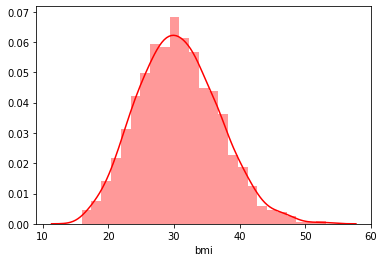

In [11]:
sns.distplot(Insure_df['bmi'],color = 'r');

In [12]:
print("Skewness of Age is \n",skew(Insure_df.bmi))

Skewness of Age is 
 0.28372857291709386


**We can see that the bmi data appears to have a normal or symmetrical distribution will have a skewness of nearly 0.**

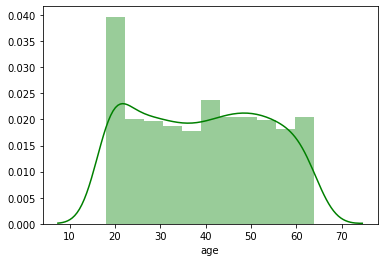

In [13]:
sns.distplot(Insure_df['age'],color = 'g');

In [14]:
print("Skewness of BMI is \n",skew(Insure_df.age))

Skewness of BMI is 
 0.055610083072599126


**We can see that the age data appears to have a uniform distribution is one in which all values are equally likely within a range and have skewness almost equal to 0**

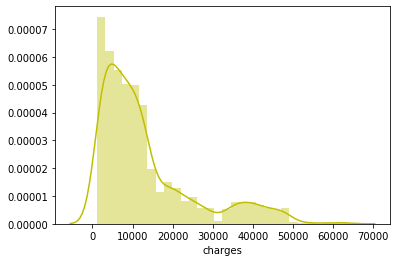

In [15]:
sns.distplot(Insure_df['charges'],color = 'y');

In [16]:
print("Skewness of Charges is \n",skew(Insure_df.charges))

Skewness of Charges is 
 1.5141797118745743


**We can see that the charges data appears to have Positive Skewness as the the tail on the right side of the distribution is longer or fatter.**

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

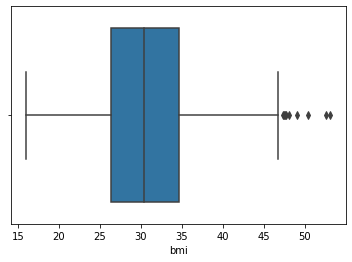

In [17]:
sns.boxplot(x=Insure_df['bmi'])

In [18]:
Q1_BMI = Insure_df['bmi'].quantile(0.25)
Q3_BMI = Insure_df['bmi'].quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI

In [19]:
print("Number of outliers in bmi column are", ((Insure_df['bmi'] < (Q1_BMI - 1.5 * IQR_BMI)) | (Insure_df['bmi'] > (Q3_BMI + 1.5 * IQR_BMI))).sum())

Number of outliers in bmi column are 9


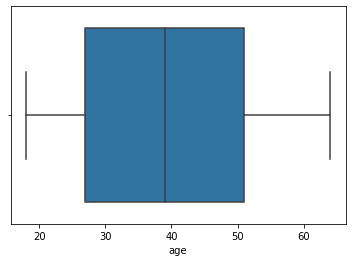

In [20]:
sns.boxplot(x=Insure_df['age'])

In [21]:
Q1_AGE = Insure_df['age'].quantile(0.25)
Q3_AGE = Insure_df['age'].quantile(0.75)
IQR_AGE = Q3_AGE - Q1_AGE

In [22]:
print("Number of outliers in age column are", ((Insure_df['age'] < (Q1_AGE - 1.5 * IQR_AGE)) | (Insure_df['age'] > (Q3_AGE + 1.5 * IQR_AGE))).sum())

Number of outliers in age column are 0


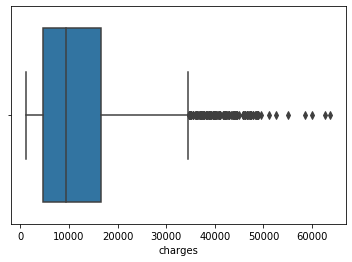

In [23]:
sns.boxplot(x=Insure_df['charges'])

In [24]:
Q1_CHARGES = Insure_df['charges'].quantile(0.25)
Q3_CHARGES = Insure_df['charges'].quantile(0.75)
IQR_CHARGES = Q3_CHARGES - Q1_CHARGES

In [25]:
print("Number of outliers in charge column are", ((Insure_df['charges'] < (Q1_CHARGES - 1.5 * IQR_CHARGES)) | (Insure_df['charges'] > (Q3_CHARGES + 1.5 * IQR_CHARGES))).sum())

Number of outliers in charge column are 139


### h. Distribution of categorical columns (include children) 

In [26]:
cols= Insure_df.select_dtypes(include=['object'])
cat_cols= list(cols.columns)
print('categorical columns are: ',cat_cols)

categorical columns are:  ['sex', 'smoker', 'region']


**Need to convert the Categorical variables to numerical**

In [27]:
dum_df = pd.get_dummies(Insure_df, columns = cat_cols,drop_first=True)
print(dum_df.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [28]:
dum_cols=list(dum_df.columns)
print(dum_cols)

['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


AxesSubplot(0.125,0.125;0.775x0.755)


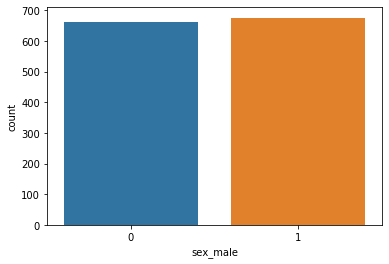

In [29]:
dum_df.groupby(["sex_male"]).count()
print(sns.countplot(x="sex_male", data=dum_df))

In [30]:
groups = dum_df.groupby(['sex_male','children']).size()
print(groups)

sex_male  children
0         0           289
          1           158
          2           119
          3            77
          4            11
          5             8
1         0           285
          1           166
          2           121
          3            80
          4            14
          5            10
dtype: int64


Number of children for females:

children
0    289
1    158
2    119
3     77
4     11
5      8
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


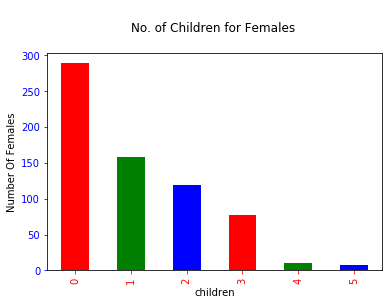

In [31]:
print('Number of children for females:\n')
print(groups[0])

# naming the y-axis 
plt.ylabel('Number Of Females') 
# plot title 
plt.title('\nNo. of Children for Females \n') 
#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='r')
ax.tick_params(axis='y', colors='b')
print('\n')
print(groups[0].plot.bar(color=['r', 'g', 'b']))

Number of children for Males:

children
0    285
1    166
2    121
3     80
4     14
5     10
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


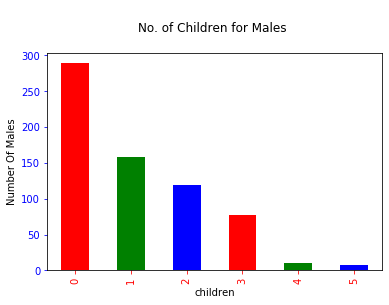

In [32]:
print('Number of children for Males:\n')
print(groups[1])

# naming the y-axis 
plt.ylabel('Number Of Males') 
# plot title 
plt.title('\nNo. of Children for Males \n') 
#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='r')
ax.tick_params(axis='y', colors='b')
print('\n')
print(groups[0].plot.bar(color=['r', 'g', 'b']))

Text(0.5, 1.0, 'Gender distribution')

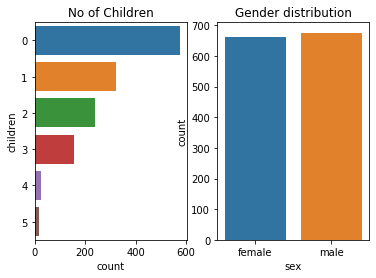

In [33]:
fig, ax = plt.subplots(1, 2)
sns.countplot(y = Insure_df['children'], ax=ax[0]).set_title('No of Children')
sns.countplot(Insure_df['sex'], ax=ax[1]).set_title('Gender distribution')

### i. Pair plot that includes all the columns of the data frame

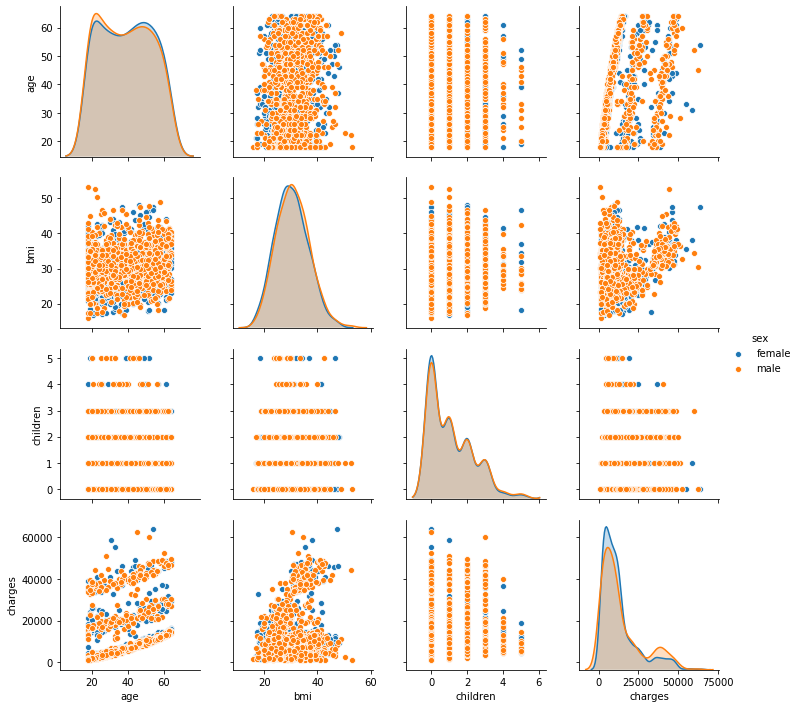

In [34]:
sns.pairplot(data=Insure_df, hue="sex")

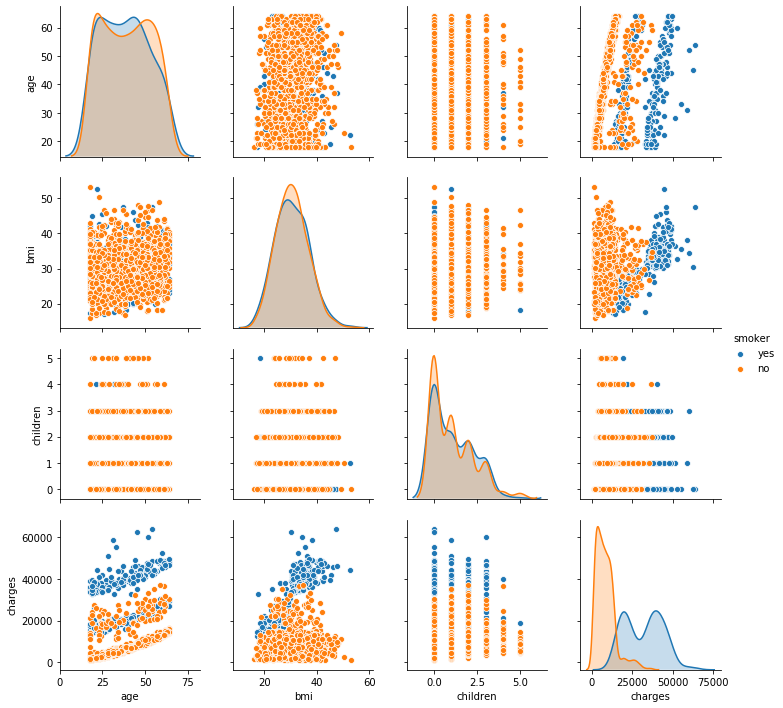

In [35]:
sns.pairplot(Insure_df,hue='smoker')

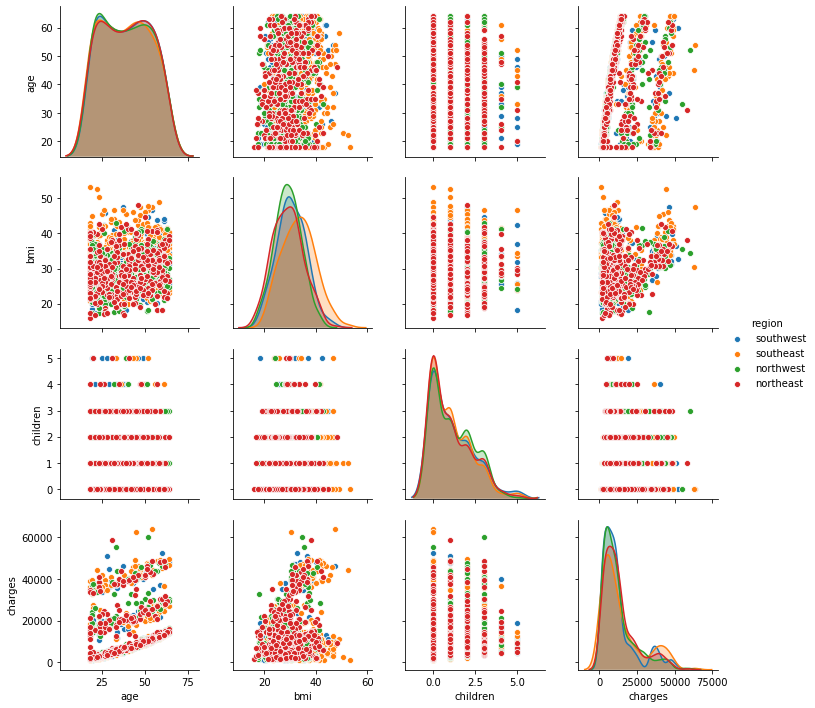

In [36]:
sns.pairplot(Insure_df,hue='region')

## 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

In [37]:
Insure_df.groupby(['smoker','charges']).size()

smoker  charges    
no      1121.87390     1
        1131.50660     1
        1135.94070     1
        1136.39940     1
        1137.01100     1
        1137.46970     1
        1141.44510     1
        1146.79660     1
        1149.39590     1
        1163.46270     1
        1241.56500     1
        1242.26000     1
        1242.81600     1
        1252.40700     1
        1253.93600     1
        1256.29900     1
        1261.44200     1
        1261.85900     1
        1263.24900     1
        1391.52870     1
        1515.34490     1
        1526.31200     1
        1532.46970     1
        1534.30450     1
        1607.51010     1
        1615.76670     1
        1621.34020     1
        1621.88270     1
        1622.18850     1
        1625.43375     1
                      ..
yes     46255.11250    1
        46599.10840    1
        46661.44240    1
        46718.16325    1
        46889.26120    1
        47055.53210    1
        47269.85400    1
        47291.05500    1
     

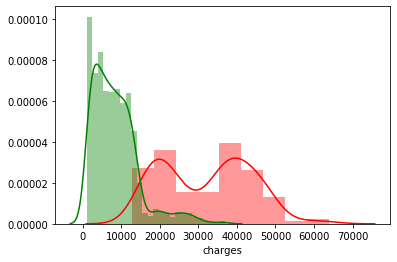

In [38]:
Smoker_yes= Insure_df[Insure_df['smoker'] == 'yes']['charges']
Smoker_no = Insure_df[Insure_df['smoker'] == 'no']['charges']
sns.distplot(Smoker_yes,color = 'r');
sns.distplot(Smoker_no,color = 'g');

Charges of smokers **(plot in red)** is significantly **high** as compared to non-smokers **(plot in green)**. 

### b. Does bmi of males differ significantly from that of females?

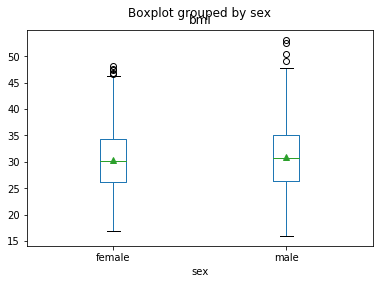

In [39]:
Insure_df.boxplot(by ='sex', column =['bmi'], grid = False, showmeans=True)

In [40]:
Q1_BMI_MALE = Insure_df[Insure_df['sex'] == 'male']['bmi'].quantile(0.25)
Q3_BMI_MALE = Insure_df[Insure_df['sex'] == 'male']['bmi'].quantile(0.75)
IQR_BMI_MALE = Q3_BMI_MALE - Q1_BMI_MALE


In [41]:
print("Number of outliers in Male bmi column are", ((Insure_df[Insure_df['sex'] == 'male']['bmi'] < (Q1_BMI_MALE - 1.5 * IQR_BMI_MALE)) | (Insure_df[Insure_df['sex'] == 'male']['bmi'] > (Q3_BMI_MALE + 1.5 * IQR_BMI_MALE))).sum())

Number of outliers in Male bmi column are 4


In [42]:
Q1_BMI_FEMALE = Insure_df[Insure_df['sex'] == 'female']['bmi'].quantile(0.25)
Q3_BMI_FEMALE = Insure_df[Insure_df['sex'] == 'female']['bmi'].quantile(0.75)
IQR_BMI_FEMALE = Q3_BMI_FEMALE - Q1_BMI_FEMALE


In [43]:
print("Number of outliers in Female bmi column are", ((Insure_df[Insure_df['sex'] == 'female']['bmi'] < (Q1_BMI_FEMALE - 1.5 * IQR_BMI_FEMALE)) | (Insure_df[Insure_df['sex'] == 'female']['bmi'] > (Q3_BMI_FEMALE + 1.5 * IQR_BMI_FEMALE))).sum())

Number of outliers in Female bmi column are 5


In [44]:
Insure_df[Insure_df['sex'] == 'male']['bmi'].describe()

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

In [45]:
Insure_df[Insure_df['sex'] == 'female']['bmi'].describe()

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

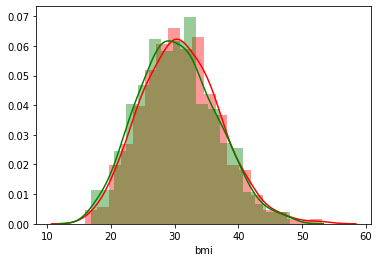

In [46]:
bmi_male= Insure_df[Insure_df['sex'] == 'male']['bmi']
bmi_female = Insure_df[Insure_df['sex'] == 'female']['bmi']
sns.distplot(bmi_male,color = 'r');
sns.distplot(bmi_female,color = 'g');

**bmi of male and female does not differ significantly**

### c. Is the proportion of smokers significantly different in different genders?

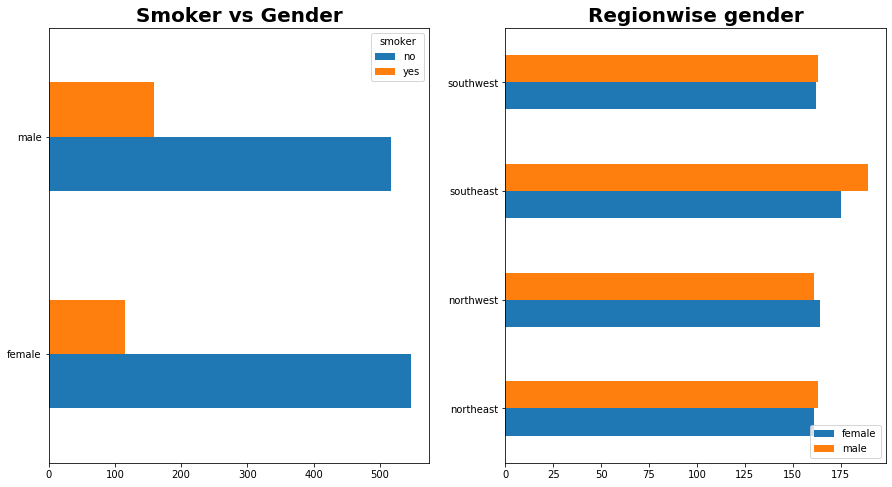

In [47]:

f,ax=plt.subplots(1,2,figsize=(15,8))

g1=Insure_df.groupby(["sex","smoker"])["age"].count().to_frame().reset_index()
g1.pivot("sex","smoker","age").plot(kind="barh",ax=ax[0])
ax[0].set_title("Smoker vs Gender",weight="bold",size=20)
ax[0].set_ylabel("")

g2=Insure_df.groupby(["sex","region"])["age"].count().to_frame().reset_index()
g2.pivot("region","sex","age").plot(kind="barh",ax=ax[1])
ax[1].set_title("Regionwise gender",weight="bold",size=20)
ax[1].set_ylabel("")


plt.legend(loc="lower right")

In [48]:
Insure_df.groupby(['smoker','sex']).count()

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

 **proportion of smokers does not significantly differ between male and female. Total Male smokers are 159 and total female smokers are 115**

### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [69]:
female_df=Insure_df[Insure_df['sex'] == 'female']

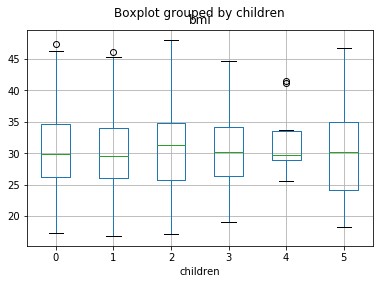

In [71]:
female_df.boxplot(column='bmi', by = 'children')

In [78]:
female_df[['children','bmi']].describe()

,children,bmi
count,662.000000,662.000000
mean,1.074018,30.377749
std,1.192115,6.046023
min,0.000000,16.815000
25%,0.000000,26.125000
50%,1.000000,30.107500
75%,2.000000,34.313750
max,5.000000,48.070000


**BMI for women does vary with number of children**

In [88]:
child0 = female_df[female_df['children'] == 0]

In [80]:
child1 = female_df[female_df['children'] == 1]

In [81]:
child2 = female_df[female_df['children'] == 2]

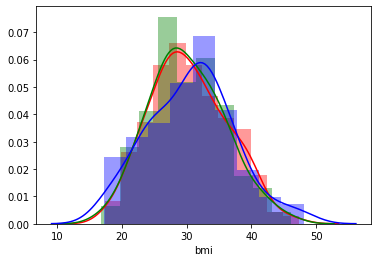

In [90]:
sns.distplot(child0['bmi'],color = 'r')
sns.distplot(child1['bmi'],color = 'g')
sns.distplot(child2['bmi'],color = 'b')

In [82]:
child0.describe()

,age,bmi,children,charges
count,289.000000,289.000000,289.0,289.000000
mean,38.346021,30.361522,0.0,11905.714276
std,16.358335,5.966934,0.0,11471.881191
min,18.000000,17.290000,0.0,1607.510100
25%,22.000000,26.200000,0.0,3171.614900
50%,36.000000,29.925000,0.0,9541.695550
75%,56.000000,34.600000,0.0,14133.037750
max,64.000000,47.410000,0.0,63770.428010


In [83]:
child1.describe()

,age,bmi,children,charges
count,158.000000,158.000000,158.0,158.000000
mean,39.506329,30.052658,1.0,12161.360414
std,11.428954,5.786831,0.0,11071.976512
min,18.000000,16.815000,1.0,2201.097100
25%,30.000000,25.982500,1.0,5046.491400
50%,41.000000,29.567500,1.0,8232.868150
75%,48.000000,33.942500,1.0,14287.374210
max,64.000000,46.090000,1.0,58571.074480


In [84]:
child2.describe()

,age,bmi,children,charges
count,119.000000,119.00000,119.0,119.000000
mean,40.512605,30.64979,2.0,13941.317326
std,12.248740,6.62820,0.0,11419.324548
min,18.000000,17.19500,2.0,2801.258800
25%,31.000000,25.77000,2.0,6358.025175
50%,42.000000,31.30000,2.0,10107.220600
75%,50.500000,34.75000,2.0,15649.704400
max,64.000000,48.07000,2.0,47305.305000


**But BMI of Women with no children, one child and two children almost same by above stats.**